In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

In [25]:

desc=pd.read_excel('glass.xlsx')
desc

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [26]:
file=pd.ExcelFile('glass.xlsx')
df=pd.read_excel(file,'glass')


In [27]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [28]:
df.shape

(214, 10)

In [29]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [30]:
df.duplicated().sum()

1

In [31]:
df.duplicated().any()

True

In [32]:
df1=df.drop_duplicates()
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [33]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [34]:
std_sca=StandardScaler()
min_sca=MinMaxScaler()

In [36]:
df1['Stand_Mg']=std_sca.fit_transform(df1[['Mg']])

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_17548\1921197556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Stand_Mg']=std_sca.fit_transform(df1[['Mg']])


In [37]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Stand_Mg
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0,1.257238
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0,0.639311
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0,0.604596
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0,0.701798
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0,0.653197
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0,-1.860172
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0,-1.860172
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0,-1.860172
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0,-1.860172


In [38]:
df1['Minmax_Si']= min_sca.fit_transform(df1[['Si']])

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_17548\68945360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Minmax_Si']= min_sca.fit_transform(df1[['Si']])


In [39]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Stand_Mg,Minmax_Si
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0,1.257238,0.351786
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0,0.639311,0.521429
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0,0.604596,0.567857
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0,0.701798,0.500000
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0,0.653197,0.583929
...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0,-1.860172,0.500000
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0,-1.860172,0.580357
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0,-1.860172,0.644643
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0,-1.860172,0.678571


<AxesSubplot:>

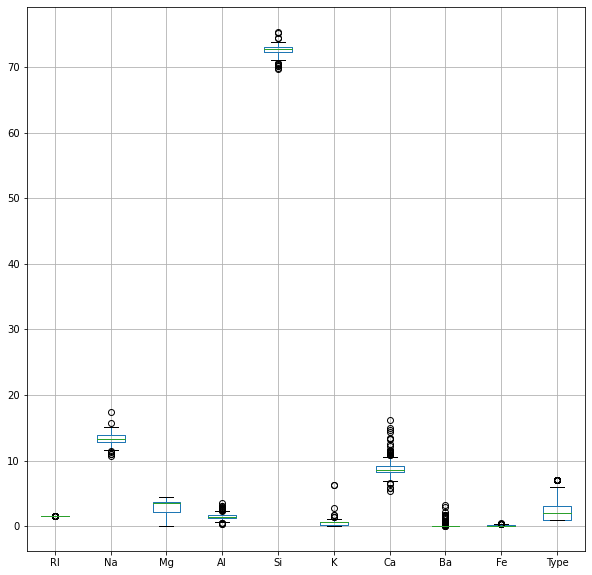

In [41]:
df.boxplot(figsize=(10,10))

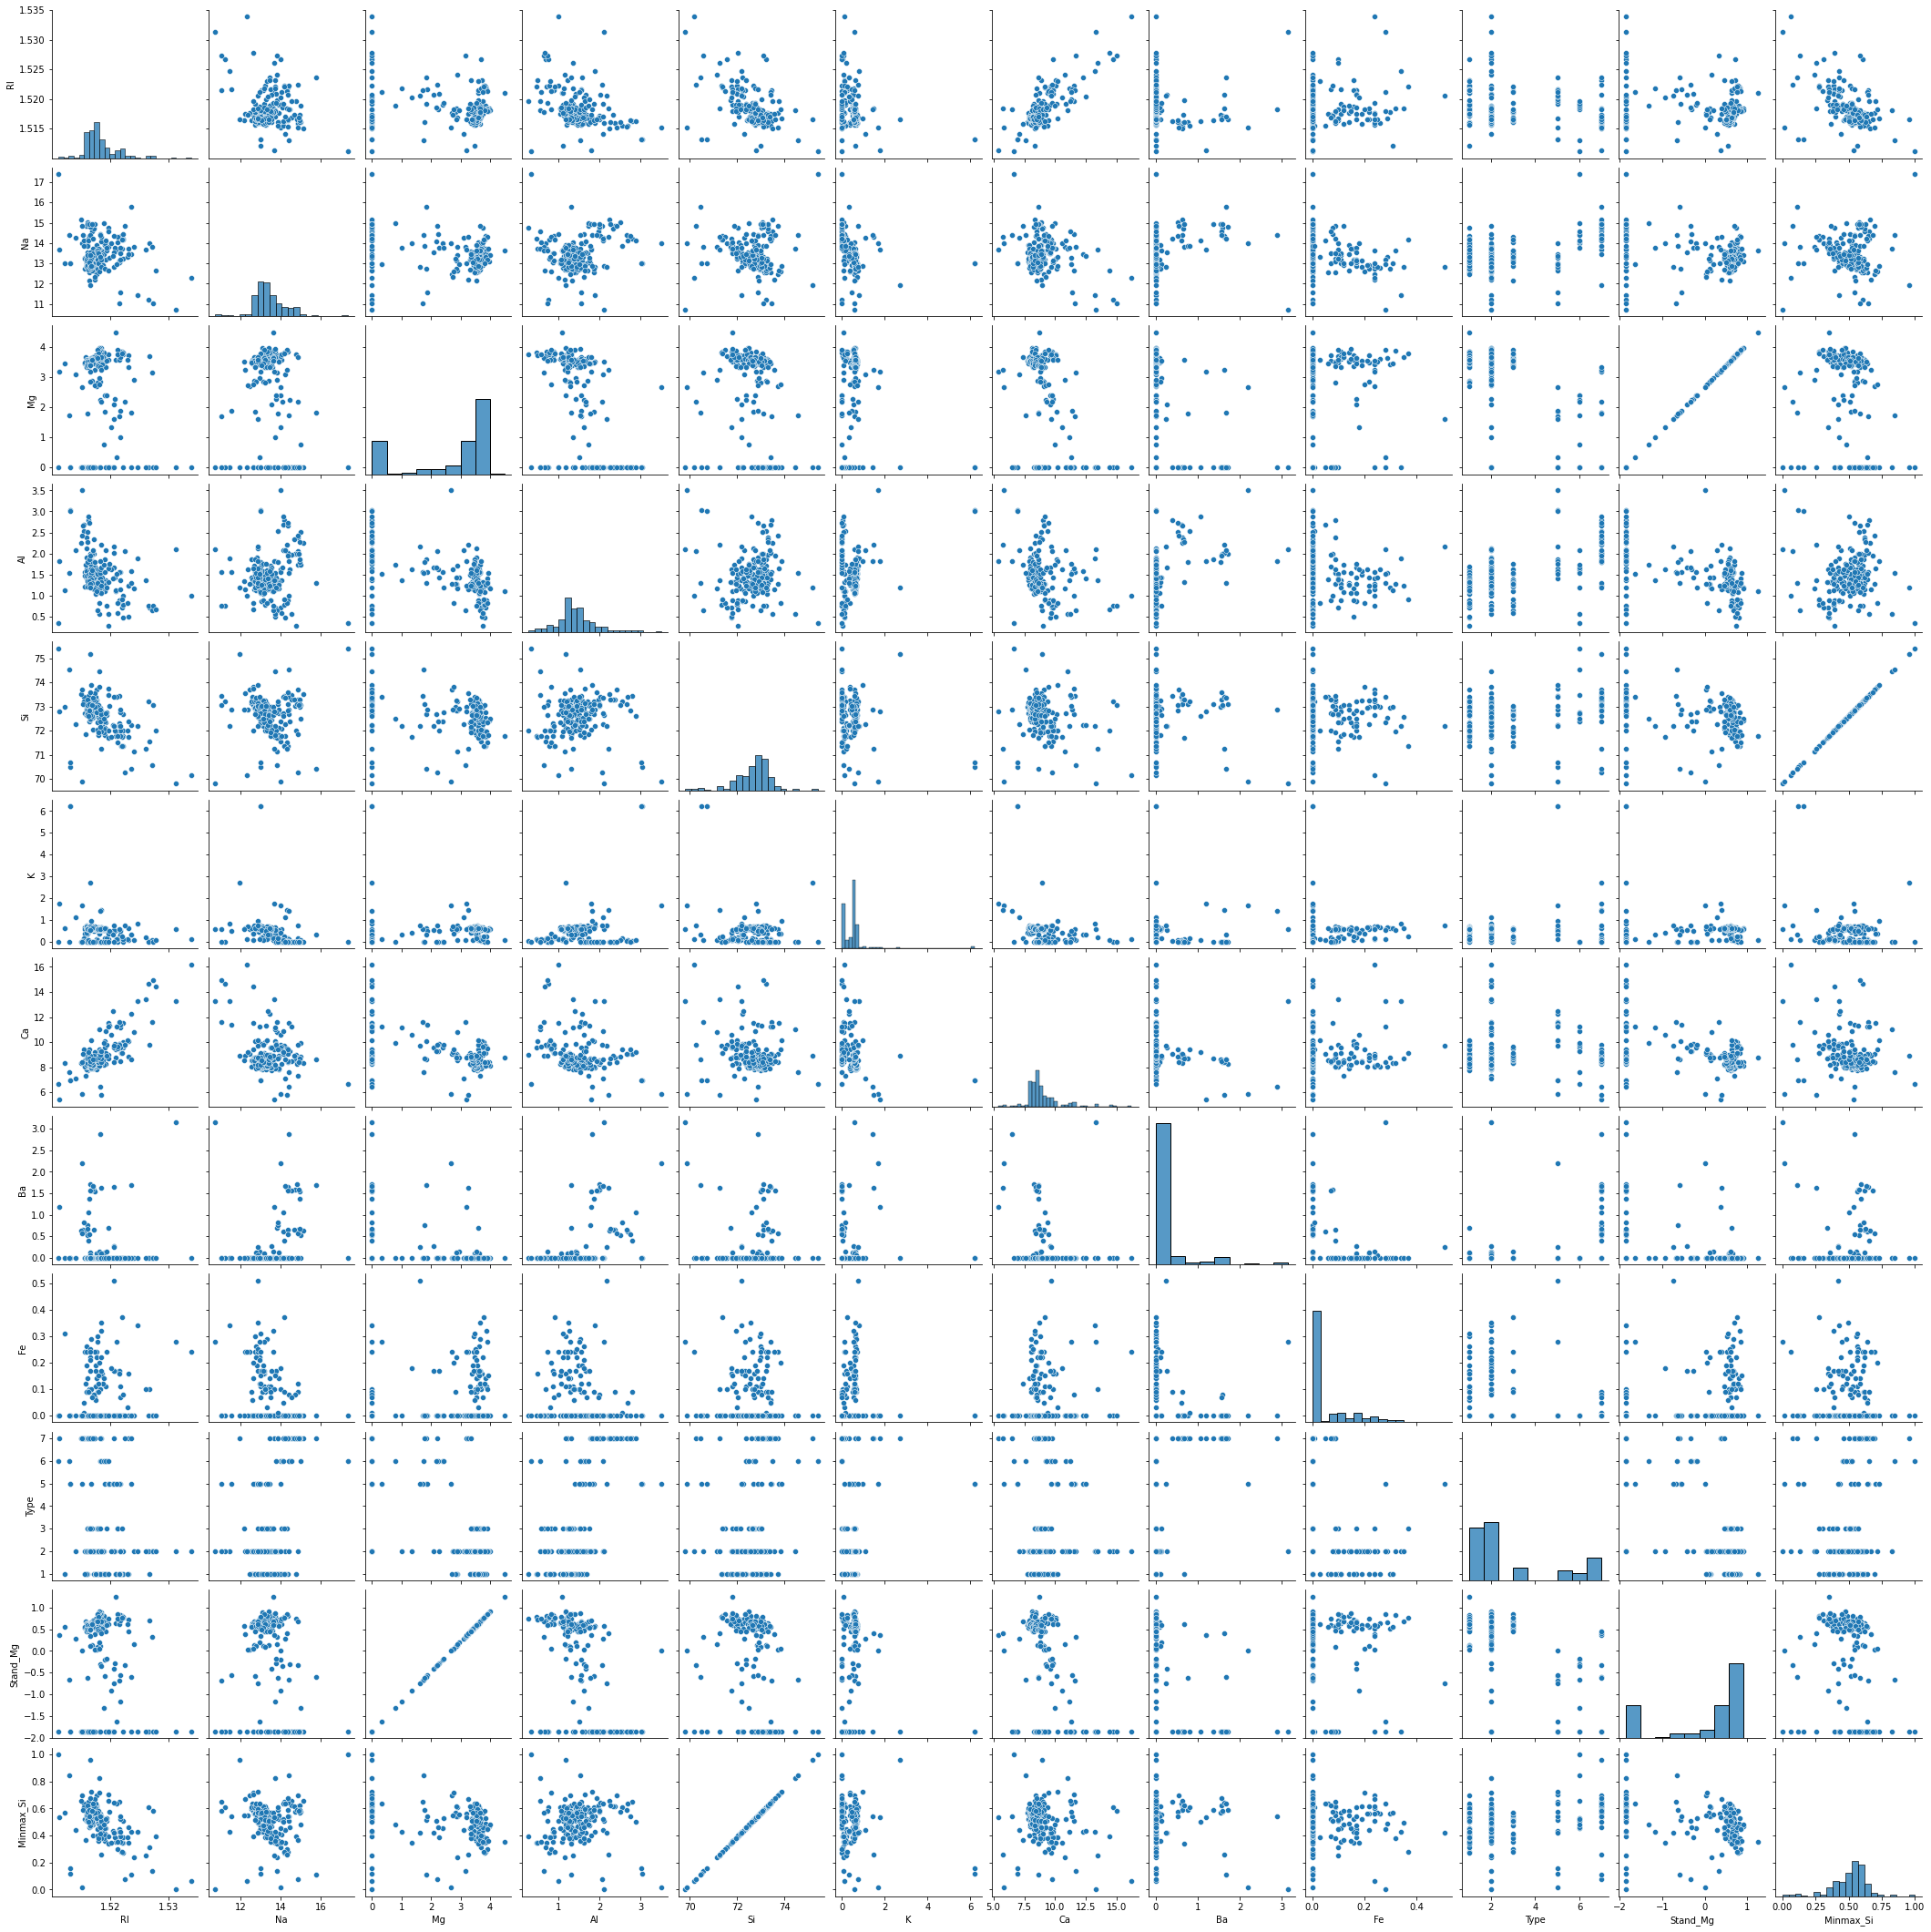

In [44]:
sns.pairplot(df1)

<AxesSubplot:>

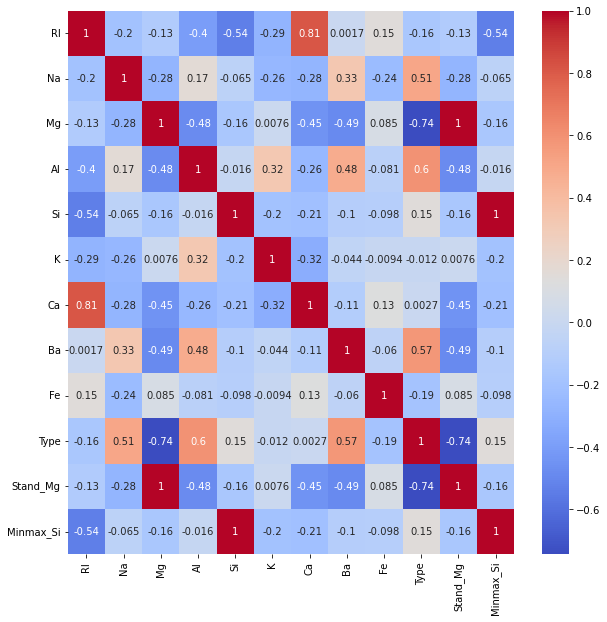

In [46]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(data=df1.corr(),annot=True,cmap='coolwarm')

In [47]:
Q1=df1['Ca'].quantile(0.25)
Q1

8.24

In [48]:
Q3=df1['Ca'].quantile(0.75)
Q3

9.15

In [49]:
IQR=Q3-Q1
IQR

0.9100000000000001

In [50]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [52]:
outliers=df1[(df1.Ca<lower) | (df1.Ca>upper)]
outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Stand_Mg,Minmax_Si
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2.0,0.326875,0.135714
104,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00,2.0,0.153300,0.239286
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2.0,-1.860172,0.425000
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2.0,-1.860172,0.000000
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2.0,-1.860172,0.062500
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2.0,-1.860172,0.510714
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2.0,-1.860172,0.828571
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2.0,-1.860172,0.607143
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2.0,-1.860172,0.583929
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2.0,-1.860172,0.394643


In [53]:
target=df[['Type']]
target

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
209,7.0
210,7.0
211,7.0
212,7.0


In [54]:
feature=df.drop('Type',axis=1)
feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [55]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=100)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171, 1)
(43, 1)


In [57]:
rand=RandomForestClassifier(n_estimators=40)

In [58]:
rand

RandomForestClassifier(n_estimators=40)

In [59]:
rand.fit(x_train,y_train)

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_17548\1197578905.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand.fit(x_train,y_train)


RandomForestClassifier(n_estimators=40)

In [60]:
y_pred=rand.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred)

0.8372093023255814

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.71      1.00      0.83        10
         2.0       0.94      0.79      0.86        19
         3.0       0.50      0.33      0.40         3
         5.0       1.00      0.80      0.89         5
         6.0       1.00      1.00      1.00         1
         7.0       0.83      1.00      0.91         5

    accuracy                           0.84        43
   macro avg       0.83      0.82      0.81        43
weighted avg       0.85      0.84      0.83        43



In [67]:
bagg=BaggingClassifier(n_estimators=60)

In [68]:
bagg.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(n_estimators=60)

In [69]:
y_pred1=bagg.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred1)

0.7674418604651163

In [71]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         1.0       0.60      0.90      0.72        10
         2.0       0.87      0.68      0.76        19
         3.0       0.50      0.33      0.40         3
         5.0       1.00      0.80      0.89         5
         6.0       1.00      1.00      1.00         1
         7.0       0.83      1.00      0.91         5

    accuracy                           0.77        43
   macro avg       0.80      0.79      0.78        43
weighted avg       0.79      0.77      0.77        43



In [75]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [82]:
ada=AdaBoostClassifier(n_estimators=50)

In [83]:
ada.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [84]:
y_pred2=ada.predict(x_test)

In [85]:
accuracy_score(y_test,y_pred2)

0.5116279069767442

In [86]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.48      0.84      0.62        19
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         5
         6.0       1.00      1.00      1.00         1
         7.0       0.56      1.00      0.71         5

    accuracy                           0.51        43
   macro avg       0.34      0.47      0.39        43
weighted avg       0.30      0.51      0.38        43



C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
grad=GradientBoostingClassifier(n_estimators=70)

In [88]:
grad.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=70)

In [89]:
y_pred3=grad.predict(x_test)

In [90]:
accuracy_score(y_test,y_pred3)

0.7906976744186046

In [91]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         1.0       0.69      0.90      0.78        10
         2.0       0.89      0.84      0.86        19
         3.0       0.00      0.00      0.00         3
         5.0       1.00      0.80      0.89         5
         6.0       1.00      1.00      1.00         1
         7.0       0.80      0.80      0.80         5

    accuracy                           0.79        43
   macro avg       0.73      0.72      0.72        43
weighted avg       0.79      0.79      0.78        43



In [1]:
##Accuracy score for the given glass dataset by using random forest classifier is:84%
##Accuracy score for the given glass dataset by using bagging classifier is:77%
##Accuracy score for given glass dataset by using adaboost classifier is:51%
##Accuracy score for the given glass dataset by using gradient boost classifier is:79%

In [2]:
## Explain Bagging and Boosting methods. How is it different from each other.

##Ans: Both bagging and boosting are the methods used in ensemble technique.Bagging is used to reduce variance and unstable data while boosting is useful to reduce bias and varience and improve week models.


## Explain how to handle imbalance in the data.

##Ans:  It requires data consideration for both data level and algorithms level method. Resampling, cost sensitive learning are the methods used to handle inbalance data. By using this methods we can find out the accuracy of the model. or which algorithm is giving better accuracy to the model.
